In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import os
import numpy as np
import glob
from scipy.stats import gaussian_kde
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
path = r'/Users/Mahad/Downloads/Step6'
outpath_figg = r'/Users/Mahad/Downloads/HistogramFigure'

In [3]:
AllData = pd.read_csv(path + "//" + 'AllLight_EveryMoth.csv')
AllData.head()

,Unnamed: 0,Unnamed: 0.1,In_Frame,Out_Frame,Proboscis,DiscoveryTime,trialNum,name
0,0,0,20377,20713,NaN,NaN,0,L0.1_c-3_m10
1,1,1,39912,41054,NaN,NaN,1,L0.1_c-3_m10
2,2,2,67784,68084,NaN,NaN,2,L0.1_c-3_m10
3,3,3,68158,69028,NaN,NaN,3,L0.1_c-3_m10
4,4,4,26059,27412,NaN,NaN,0,L0.1_c-3_m12


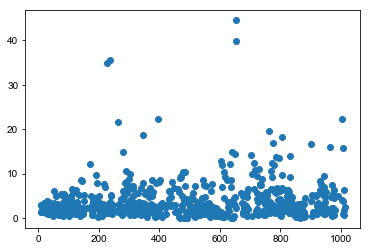

In [4]:
plt.plot(AllData.DiscoveryTime/100, 'o')

/Users/Mahad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Mahad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


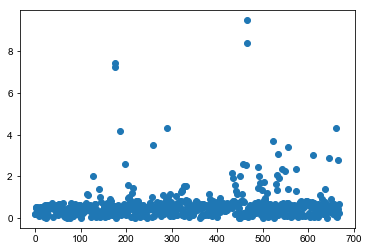

In [6]:
AllData_notnull = AllData[AllData.DiscoveryTime.notnull()]
z = np.abs(stats.zscore(AllData_notnull.DiscoveryTime.values))
outlier_ID = z > 5
plt.plot(z, 'o') 

AllData_notnull['zscore'] = z
AllData_notnull['outlier_ID'] = outlier_ID

In [ ]:
AllData_notnull[AllData_notnull.outlier_ID == True]

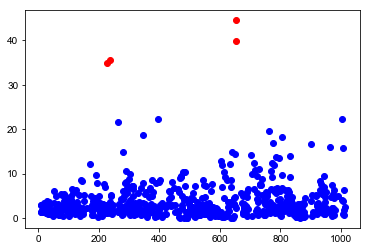

In [7]:
plt.plot(AllData_notnull.DiscoveryTime[AllData_notnull.outlier_ID == True]/100, 'o', color = 'red')
plt.plot(AllData_notnull.DiscoveryTime[AllData_notnull.outlier_ID == False]/100, 'o', color = 'blue')

/Users/Mahad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


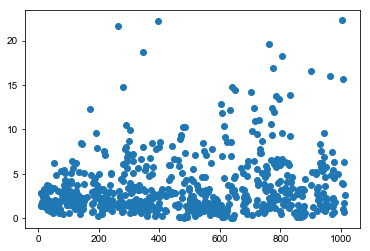

In [8]:
notoutliers = AllData_notnull[AllData_notnull.outlier_ID == False]
notoutliers['DiscoveryTime'] = notoutliers.DiscoveryTime.div(100, axis = 'index')
plt.plot(notoutliers['DiscoveryTime'], 'o')

Text(0.5,0,'Occurance')

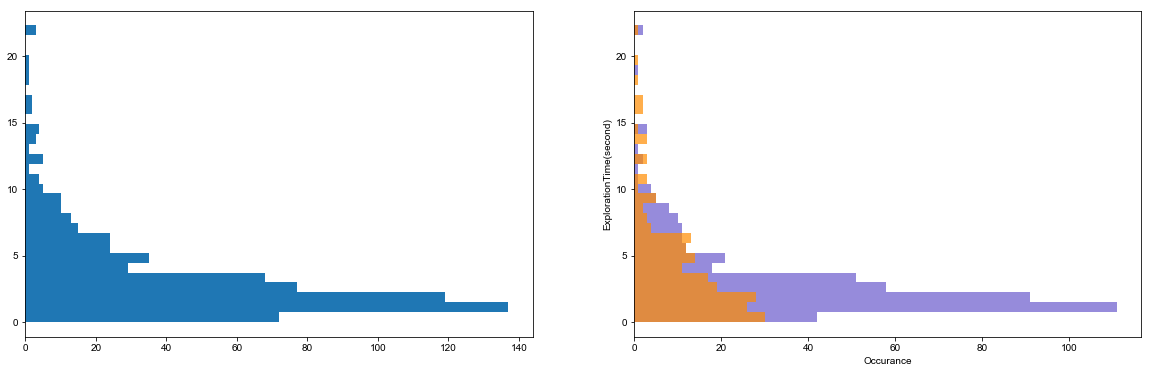

In [9]:
hist, bins = np.histogram(notoutliers.DiscoveryTime.values, bins = 30)

fig, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

ax[0].hist(notoutliers.DiscoveryTime.values, bins, histtype = 'bar', orientation='horizontal')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L0.1_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'slateblue')
ax[1].hist(notoutliers.DiscoveryTime[notoutliers.name.str.contains('L50_')].values, bins, 
          orientation='horizontal', alpha = 0.7, color = 'darkorange')
ax[1].set_ylabel('ExplorationTime(second)')
ax[1].set_xlabel('Occurance')

In [10]:
len(bins)

31

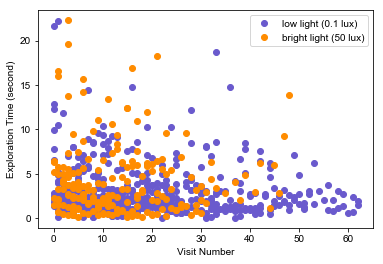

In [11]:
plt.plot(notoutliers[notoutliers.name.str.contains('L0.1')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L0.1')].DiscoveryTime,
         'o', color = 'slateblue', label = 'low light (0.1 lux)')
plt.plot(notoutliers[notoutliers.name.str.contains('L50')].trialNum, 
         notoutliers[notoutliers.name.str.contains('L50')].DiscoveryTime, 
         'o', color = 'darkorange', label = 'bright light (50 lux)')
plt.ylabel('Exploration Time (second)')
plt.xlabel('Visit Number')
plt.legend()

# add exponential curves - color: L50 - chocolate or saddle brown, L0.1 - darkslateblue, or blue violet

In [12]:
notoutliers['lightLevel'] = ['low' if 'L0.1' in value 
                           else 'high' for value in notoutliers['name']]
notoutliers.keys()

/Users/Mahad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['Unnamed: 0', 'Unnamed: 0.1', 'In_Frame', 'Out_Frame', 'Proboscis',
       'DiscoveryTime', 'trialNum', 'name', 'zscore', 'outlier_ID',
       'lightLevel'],
      dtype='object')

In [13]:
first_0thru10_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values)
first_5thru15_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 5) & (notoutliers.trialNum <= 14)].values)
first_10thru20_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values)
first_15thru25_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)].values)
first_20thru30_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values)

In [14]:
first_0thru10_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values)
first_5thru15_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values)
first_10thru20_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 17)].values)
first_15thru25_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)].values)
first_20thru30_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values)

In [15]:
#0thru10
print('low visits',first_0thru10_low), print('high visits',first_0thru10_high)

low visits 152
high visits 88


(None, None)

In [16]:
#5thru15
print('low visits',first_5thru15_low), print('high visits',first_5thru15_high)

low visits 144
high visits 85


(None, None)

In [17]:
#10thru20
print('low visits',first_10thru20_low), print('high visits',first_10thru20_high)

low visits 133
high visits 61


(None, None)

In [18]:
#15thru25
print('low visits',first_15thru25_low), print('high visits',first_15thru25_high)

low visits 63
high visits 35


(None, None)

In [19]:
#20thru30
print('low visits',first_20thru30_low), print('high visits',first_20thru30_high)

low visits 86
high visits 37


(None, None)

In [ ]:
a,b, _ = plt.hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
plt.plot(a+1e-10,b[1:]+1e-10,'-o')

In [ ]:
fig, ax = plt.subplots(1,5, figsize = (20,5), sharex = True, sharey = True)
ax = ax.ravel()


hist_0thru10_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_0thru10_highlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 9)].values,  
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)


hist_5thru15_lowlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                      (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_5thru15_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                      (notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)


hist_10thru20_lowlight, _, _ = ax[2].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_10thru20_highlight, _, _ = ax[2].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)

hist_15thru25_lowlight, _, _ = ax[3].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                       (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_15thru25_highlight, _, _ = ax[3].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                      (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 24)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)



         
    
hist_20thru30_lowlight, _, _ = ax[4].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values,
           bins, orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_20thru30_highlight, _, _ = ax[4].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50_')) & 
                                     (notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)].values, 
           bins, orientation='horizontal', alpha = 0.7, color = 'darkorange', density = True)




ax[0].set_title('Visits 0-10', size = 25)
ax[1].set_title('Visits 5-15', size = 25)
ax[2].set_title('Visits 10-20', size = 25)
ax[3].set_title('Visits 15-25', size = 25)
ax[4].set_title('Visits 20-30', size = 25)
                                     



ax[0].set_ylim(-2, 26)
# ax[0].set_ylabel('ExplorationTime (seconds)', size = 30, color = 'k')
ax[0].set_xlim(0,.33)

ax[0].tick_params(labelsize = 25, labelcolor = 'k')
ax[1].tick_params(labelsize = 25, labelcolor = 'k')
ax[2].tick_params(labelsize = 25, labelcolor = 'k')
ax[3].tick_params(labelsize = 25, labelcolor = 'k')
ax[4].tick_params(labelsize = 25, labelcolor = 'k')



ax[0].text(0.05, 22, 'Successful visits =  ' + str(first_0thru10_low), color = 'indigo', weight = 'bold', size = 14)
ax[0].text(0.05, 19, 'Successful visits =  ' + str(first_0thru10_high), color = 'orangered', weight = 'bold', size = 14)


ax[1].text(0.05, 22, 'Successful visits =  ' + str(first_5thru15_low), color = 'indigo', weight = 'bold', size = 14)
ax[1].text(0.05, 19, 'Successful visits =  ' + str(first_5thru15_high), color = 'orangered', weight = 'bold', size = 14)


ax[2].text(0.05, 22, 'Successful visits =  ' + str(first_10thru20_low),  color = 'indigo', weight = 'bold',size = 14)
ax[2].text(0.05, 19, 'Successful visits =  ' + str(first_10thru20_high), color = 'orangered', weight = 'bold', size = 14)


ax[3].text(0.05, 22, 'Successful visits =  ' + str(first_15thru25_low), color = 'indigo', weight = 'bold', size = 14)
ax[3].text(0.05, 19, 'Successful visits =  ' + str(first_15thru25_high), color = 'orangered', weight = 'bold', size = 14)


ax[4].text(0.05, 22, 'Successful visits =  ' + str(first_20thru30_low), color = 'indigo', weight = 'bold', size = 14)
ax[4].text(0.05, 19, 'Successful visits =  ' + str(first_20thru30_high), color = 'orangered', weight = 'bold', size = 14)



                                         
outpath_figg = r'/Users/Mahad/Downloads/HistogramFigure'
plt.savefig(outpath_figg + "//" + 'Visits_0-30.png')
# if the plots are normalized to the total number of hits for each window then the size difference in the 20+seconds bin is due to a larger proportion of each condition being from the lower time bins as the moths learn

In [ ]:
def KL(P,Q, epsilon):
# """ Epsilon is used here to avoid conditional code for
# checking that neither P nor Q is equal to 0. """
     epsilon = 1e-20
# You may want to instead make copies to avoid changing the np arrays.
     P = P+epsilon
     Q = Q+epsilon
     
     divergence = np.sum(P*np.log(P/Q))
      
     return divergence

In [ ]:
#Divergence for first 10 visits
KL(hist_0thru10_lowlight, hist_0thru10_highlight, 1e-30)

In [ ]:
#Divergence for visits 5-15
KL(hist_5thru15_lowlight, hist_5thru15_highlight, 1e-30)

In [ ]:
#Divergence for visits 10-20
KL(hist_10thru20_lowlight, hist_10thru20_highlight, 1e-30)

In [ ]:
#Divergence for visits 15-25
KL(hist_15thru25_lowlight, hist_15thru25_highlight, 1e-30)

In [ ]:
hist_0thru10_lowlight, hist_0thru10_lowlight + 1e-20, hist_0thru10_lowlight + 1e2

In [ ]:
#Significance for first 10 visits
stats.ks_2samp(hist_0thru10_lowlight,
hist_0thru10_highlight), stats.ks_2samp(hist_0thru10_lowlight+1e-20,
                                        hist_0thru10_highlight+1e-20), stats.ks_2samp(hist_0thru10_lowlight+1e2,
                                                                                      hist_0thru10_highlight+1e2)

In [ ]:
#Significance for visits 5-15
stats.ks_2samp(hist_5thru15_lowlight, hist_5thru15_highlight)

In [ ]:
#Significance for visits 10-20
stats.ks_2samp(hist_10thru20_lowlight,hist_10thru20_highlight)

In [ ]:
#Significance for visits 15-25
stats.ks_2samp(hist_15thru25_lowlight, hist_15thru25_highlight)

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')
 
# Grouped boxplot
sns.boxplot(x="lightLevel", y="DiscoveryTime", data=notoutliers, palette="Set1")
# sns.plt.show()

In [ ]:
test = notoutliers

In [ ]:
First_3 = notoutliers[(notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 3)]
First_5 = notoutliers[(notoutliers.trialNum >= 4) & (notoutliers.trialNum <= 14)]
First_10 = notoutliers[(notoutliers.trialNum >= 9) & (notoutliers.trialNum <= 19)]
# Visits_15thru25 = notoutliers[(notoutliers.trialNum > 14) & (notoutliers.trialNum <= 24)]
First_20 = notoutliers[(notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)] 
First_30 = notoutliers[(notoutliers.trialNum >= 19) & (notoutliers.trialNum <= 29)]
All = notoutliers[(notoutliers.trialNum >= 24) & (notoutliers.trialNum <= 34)]
#look at data to see better lateTrial numbers

In [ ]:
def kde_scipy(x):
    """Kernel Density Estimation with Scipy"""
    kde = gaussian_kde(x)
    return kde

In [ ]:
alldata = First_3.DiscoveryTime/100
_,bins = np.histogram(alldata, bins = 100, density = True)
bin_center = 0.5*(bins[1:]+bins[:-1])
bin_center = np.linspace(0,60,200)
delta = np.diff(bin_center)[0]

In [ ]:
for flower, df in First_3.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
for flower, df in First_5.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
# alldata = First_10.DiscoveryTime/100
# _,bins = np.histogram(alldata, bins = 100, density = True)
# bin_center = 0.5*(bins[1:]+bins[:-1])
# bin_center = np.linspace(0,60,200)
# delta = np.diff(bin_center)[0]

In [ ]:
for flower, df in First_10.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
# for flower, df in Visits_15thru25.groupby('lightLevel'):
#     plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
#     plt.legend()

In [ ]:
for flower, df in First_20.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
for flower, df in First_30.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
for flower, df in All.groupby('lightLevel'):
    plt.hist(df.DiscoveryTime/100, histtype='bar', label = flower, alpha = 0.5)
    plt.legend()

In [ ]:
First_3_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_5_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_10_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
# Visits_15thru25_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_20_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
First_30_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
All_df = pd.DataFrame(index = bin_center, columns = ['Low', 'High'], dtype = 'float')
SampleSize = pd.DataFrame(index = ['low', 'high'], columns = ['3', '5', '10', '15-25', '20', '30', 'all'], dtype = 'float')

In [ ]:
from scipy.stats import gaussian_kde

plt.set_cmap('Spectral')
f2, ax2 = plt.subplots(1,5,sharex = True, sharey = True, figsize = (20,5))


offset = 0

V_0thru10_low = []
V_0thru10_high = []
for f, df in First_3.groupby('lightLevel', sort = True):
    print(f)
    data = df.DiscoveryTime   
    SampleSize.loc[f,'3'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_3_df.loc[:,f]=temp
    if f.startswith("low"):
        c = 'indigo'
        V_0thru10_low.extend(temp)
        d = 'midnightblue'
    elif f.startswith("high"):
        c = 'darkorange'
        V_0thru10_high.extend(temp)
        
        d = 'darkred'

    p = ax2[0].plot(temp, bin_center, label = f, color = c)
    ax2[0].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01

    ax2[0].set_title('Visits 0-10')
offset = 0
V_5thru15_low = []
V_5thru15_high = []
for f, df in First_5.groupby('lightLevel', sort = True):

    data = df.DiscoveryTime    
    SampleSize.loc[f,'5'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_5_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
        V_5thru15_low.extend(temp)
        d = 'midnightblue'
    elif f.startswith("high"):
        c = 'darkorange'
        V_5thru15_high.extend(temp)
        d = 'darkred'
        

    p = ax2[1].plot(temp, bin_center,  label = f, color = c)
    ax2[1].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01

    ax2[1].set_title('Visits 5-15')
    
offset = 0
V_10thru20_low = []
V_10thru20_high = []
for f, df in First_10.groupby('lightLevel', sort = True):
    
    data = df.DiscoveryTime   
    SampleSize.loc[f,'10'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_10_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
        V_10thru20_low.extend(temp)
        d = 'midnightblue'
    elif f.startswith("high"):
        c = 'darkorange'
        
        V_10thru20_high.extend(temp)
        d = 'darkred'

    p = ax2[2].plot(temp, bin_center, label = f, color = c)
    ax2[2].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01

    ax2[2].set_title('Visits 10-20')
offset = 0
V_15thru25_low = []
V_15thru25_high = []
for f, df in First_20.groupby('lightLevel', sort = True):

    data = df.DiscoveryTime    
    SampleSize.loc[f,'20'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_20_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
        V_15thru25_low.extend(temp)
        d = 'midnightblue'
    elif f.startswith("high"):
        c = 'darkorange'
        V_15thru25_high.extend(temp)
        d = 'darkred'
        
#     ax1[1].plot(bin_center, hist)
    p = ax2[3].plot(temp, bin_center, label = f, color = c)
    ax2[3].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01
#     ax2[3].legend()
    ax2[3].set_title('Visits 15-25')
    
offset = 0
V_20thru30_low = []
V_20thru30_high = []
for f, df in First_30.groupby('lightLevel', sort = True):
    print(f)
    data = df.DiscoveryTime   
    SampleSize.loc[f,'30'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    First_30_df.loc[:,f]=temp
    
    if f.startswith("low"):
        c = 'indigo'
        V_20thru30_low.extend(temp)
        d = 'midnightblue'
    elif f.startswith("high"):
        c = 'darkorange'
        
        V_20thru30_high.extend(temp)
        d = 'darkred'
#     ax1[0].plot(bin_center, hist)
    p = ax2[4].plot(temp, bin_center, label = f, color = c)
    ax2[4].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01
#     ax2[4].legend()
    ax2[4].set_title('Visits 20-30')

ax2[0].set_ylabel('Exploration Time (seconds)', size = 30, color = 'k')
ax2[0].set_ylim(-3,26)

ax2[0].text(.645,-9,'Probability Density', size = 30)
ax2[0].tick_params(labelsize = 25, labelcolor = 'k')
ax2[1].tick_params(labelsize = 25, labelcolor = 'k')
ax2[2].tick_params(labelsize = 25, labelcolor = 'k')
ax2[3].tick_params(labelsize = 25, labelcolor = 'k')
ax2[4].tick_params(labelsize = 25, labelcolor = 'k')
ax2[0].set_xlim(-.04,0.26)


ax2[0].text(0.017, 23, ' p = 0.014 (KS Test)', color = 'r', weight = 'bold', size = 16 )
ax2[0].text(0.021, 20, 'D =  0.362 (KL Test)', size = 15)
ax2[1].text(0.017, 23, ' p = 1.10e-6 (KS Test)', color = 'r', weight = 'bold', size = 16 )
ax2[1].text(0.021, 20, 'D = 0.170 (KL Test)', size = 15)
ax2[2].text(0.017, 23, ' p = 7.66e-10 (KS Test)', color = 'r', weight = 'bold', size = 16 )
ax2[2].text(0.021, 20, 'D = 0.415 (KL Test)', size = 15)
ax2[3].text(0.017, 23, ' p = 2.40e-11 (KS Test)', color = 'r', weight = 'bold', size = 16 )
ax2[3].text(0.021, 20, 'D = 0.691 (KL Test)', size = 15)
ax2[4].text(0.017, 23, ' p = 2.70e-17 (KS Test)', color = 'r', weight = 'bold', size = 16)
ax2[4].text(0.021, 20, 'D = 0.452 (KL Test)', size = 15)

plt.tight_layout()
plt.savefig(outpath_figg + "//" + 'Visits0-30_Stats_Plot_PDE.png')


In [ ]:
#first ten visits
KL(np.asarray(V_0thru10_low),np.asarray(V_0thru10_high), 1e-30), stats.ks_2samp(V_0thru10_low,V_0thru10_high)

In [ ]:
#visits 5-15
KL(np.asarray(V_5thru15_low),np.asarray(V_5thru15_high), 1e-30), stats.ks_2samp(V_5thru15_low,V_5thru15_high)

In [ ]:
#visits 10-20
KL(np.asarray(V_10thru20_low),np.asarray(V_10thru20_high), 1e-30), stats.ks_2samp(V_10thru20_low,V_10thru20_high)

In [ ]:
#visits 15-25
KL(np.asarray(V_15thru25_low),np.asarray(V_15thru25_high), 1e-30), stats.ks_2samp(V_15thru25_low,V_15thru25_high)

In [ ]:
#visits 20-30 (although sample size is pretty low)
KL(np.asarray(V_20thru30_low),np.asarray(V_20thru30_high), 1e-30), stats.ks_2samp(V_20thru30_low,V_20thru30_high)

In [20]:
first_3_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 3)].values)
first_3_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 3)].values)
V_14thru19_low = len(notoutliers[(notoutliers.name.str.contains('L0.1')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)].values)
V_14thru19_high = len(notoutliers[(notoutliers.name.str.contains('L50')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)].values)

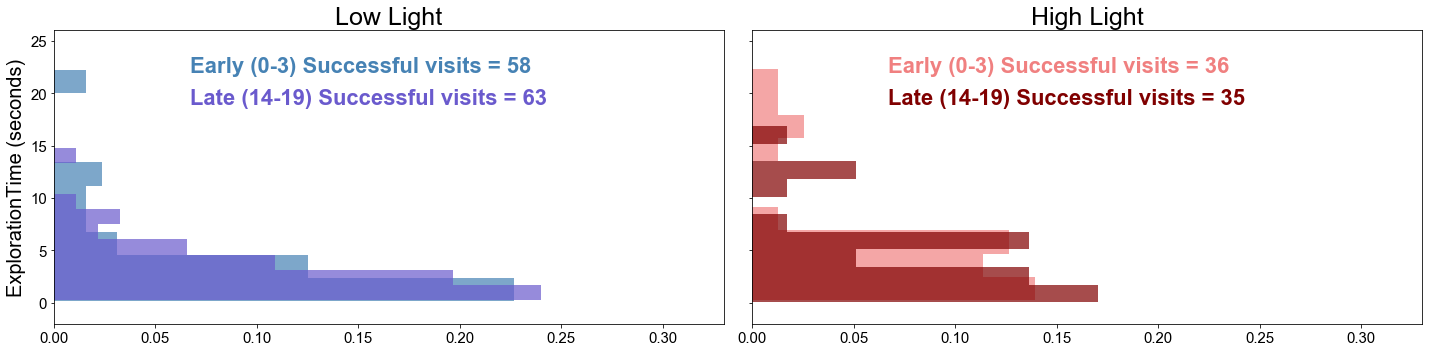

In [24]:
#add a comparison between the early and late visits within a light level (one plot comparing two time points with similar N size maybe 0-10 vs 15-25?)fig, ax = plt.subplots(1,2, figsize = (20,5), sharex = True, sharey = True)
fig, ax = plt.subplots(1,2, figsize = (20,5), sharex = True, sharey = True)
ax = ax.ravel()


hist_early_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 3)].values,
            orientation='horizontal', alpha = 0.7, color = 'steelblue', density = True)
hist_late_lowlight, _, _ = ax[0].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L0.1_')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)].values, 
            orientation='horizontal', alpha = 0.7, color = 'slateblue', density = True)
hist_early_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50')) & 
                                     (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 3)].values, orientation='horizontal', alpha = 0.7, color = 'lightcoral', density = True)
hist_late_highlight, _, _ = ax[1].hist(notoutliers.DiscoveryTime[(notoutliers.name.str.contains('L50')) & 
                                     (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)].values, orientation='horizontal', alpha = 0.7, color = 'maroon', density = True)

ax[0].set_title('Low Light', size = 25)
ax[1].set_title('High Light', size = 25)
                                      



ax[0].set_ylim(-2, 26)
ax[0].set_ylabel('ExplorationTime (seconds)', size = 20, color = 'k')
ax[0].set_xlim(0,.33)
# ax[0].text(.35,-9,'Probability occurance', size = 24)
ax[0].tick_params(labelsize = 15, labelcolor = 'k')
ax[1].tick_params(labelsize = 15, labelcolor = 'k')



ax[0].text(0.067, 22, 'Early (0-3) Successful visits = ' + str(first_3_low), color = 'steelblue', weight = 'bold', size = 22)
ax[0].text(0.067, 19, 'Late (14-19) Successful visits = ' + str(V_14thru19_low), color = 'slateblue', weight = 'bold', size = 22)
# ax[0].text(0.2, 22, color = 'r', weight = 'bold', size = 22)


ax[1].text(0.067, 22, 'Early (0-3) Successful visits = ' + str(first_3_high), color = 'lightcoral', weight = 'bold', size = 22)
ax[1].text(0.067, 19, 'Late (14-19) Successful visits = ' + str(V_14thru19_high), color = 'maroon', weight = 'bold', size = 22)
# ax[1].text(0.2, 22, color = 'k', weight = 'bold', size = 22)
plt.tight_layout()
# plt.savefig(outpath_figg + "//" + 'Early_0thru3_Late_14thru19_Comparison_AcrossLights.png')

In [ ]:
#learning comparing the early and later visits lower light. A negative value means the second thing is less ?? (that's how it is between light levels)
KL(hist_early_lowlight, hist_late_lowlight, 1e-30), stats.ks_2samp(hist_early_lowlight,hist_late_lowlight)

In [ ]:
#learning comparing the early and later visits higher light
KL(hist_early_highlight, hist_late_highlight, 1e-30), stats.ks_2samp(hist_early_highlight,hist_late_highlight)

notoutliers.keys()

In [ ]:
low = notoutliers[(notoutliers.name.str.contains('L0.1_')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 3)| (notoutliers.name.str.contains('L0.1_')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)]
high = notoutliers[(notoutliers.name.str.contains('L50_')) & (notoutliers.trialNum >= 0) & (notoutliers.trialNum <= 3)| (notoutliers.name.str.contains('L50_')) & (notoutliers.trialNum >= 14) & (notoutliers.trialNum <= 19)]

In [ ]:
low.trialNum.values

In [ ]:
visit_epoch = []
for element in low.trialNum.values:
    if element < 10:
        visit_epoch.append("early")
    else:
        visit_epoch.append("late")
visit_epoch

In [ ]:
element

In [ ]:
high_visit_epoch = []
for element in high.trialNum.values:
    if element < 10:
        high_visit_epoch.append("early")
    else:
        high_visit_epoch.append("late")
high_visit_epoch

In [ ]:
visit_chunk = pd.DataFrame(data = visit_epoch, columns = ["visit_chunk"])
high_visit_chunk = pd.DataFrame(data = high_visit_epoch, columns = ["visit_chunk"])

In [ ]:
low = low.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
low.reset_index(drop=True, inplace=True)
high = high.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
high.reset_index(drop=True, inplace=True)

In [ ]:
low = pd.concat([low, visit_chunk], axis = 1)
high = pd.concat([high, high_visit_chunk], axis = 1)

In [ ]:
high.keys()

In [ ]:
alldata = low.DiscoveryTime/100
_,bins = np.histogram(alldata, bins = 100, density = True)
bin_center = 0.5*(bins[1:]+bins[:-1])
bin_center = np.linspace(0,60,200)
delta = np.diff(bin_center)[0]

In [ ]:
low_df = pd.DataFrame(index = bin_center, columns = ['early', 'late'], dtype = 'float')
high_df = pd.DataFrame(index = bin_center, columns = ['early', 'late'], dtype = 'float')
light_level = pd.DataFrame(index = ['early', 'late'], columns = ['low', 'high'], dtype = 'float')

In [ ]:
light_level

In [ ]:
from scipy.stats import gaussian_kde

plt.set_cmap('Spectral')
f2, ax2 = plt.subplots(1,2,sharex = True, sharey = True, figsize = (20,5))


offset = 0
t_l_e = []
t_l_l = []

for f, df in low.groupby('visit_chunk', sort = True):
    
    data = df.DiscoveryTime   
    light_level.loc[f,'low'] = len(data)
    print(len(data))
    kde = kde_scipy(data)
    
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    low_df.loc[:,f] = temp
    
    
    if f.startswith("early"):
        c = 'steelblue'
        t_l_e.extend(temp)
        d = 'steelblue'
    elif f.startswith("late"):
        c = 'indigo'
        t_l_l.extend(temp)
        
        d = 'indigo'

    p = ax2[0].plot(temp, bin_center, label = f, color = c)
    ax2[0].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01

    ax2[0].set_title('Low', size = 20)
offset = 0
t_h_e = []
t_h_l = []

for f, df in high.groupby('visit_chunk', sort = True):
    
    data = df.DiscoveryTime   
    light_level.loc[f,'high'] = len(data)
    kde = kde_scipy(data)
    
    temp = kde.pdf(bin_center)
    temp /= delta * np.sum(temp)
    high_df.loc[:,f]=temp
    
    
    if f.startswith("early"):
        
        c = 'lightcoral'
        t_h_e.extend(temp)
        d = 'lightcoral'
    elif f.startswith("late"):
        t_h_l.extend(temp)
        c = 'maroon'
        
        
        d = 'maroon'
    p = ax2[1].plot(temp, bin_center, label = f, color = c)
    ax2[1].plot([-0.01 + offset]*len(data), data, 'o', ms = 2, color = c, mec = d, alpha = 0.35)
    offset+=-0.01

    ax2[1].set_title('High', size = 20)
ax2[0].set_ylim(-2, 26)
ax2[0].set_ylabel('ExplorationTime (seconds)', size = 20, color = 'k')
ax2[0].set_xlim(-.03, .33)
ax2[0].tick_params(labelsize = 15, labelcolor = 'k')
ax2[1].tick_params(labelsize = 15, labelcolor = 'k')
ax2[0].text(0.15, 20, ' p = 2.46e-14 (KS Test)', color = 'r', weight = 'bold', size = 17 )
ax2[1].text(0.15, 20, ' p = 2.39e-5 (KS Test)', color = 'r', weight = 'bold', size = 17 )
plt.tight_layout()
plt.savefig(outpath_figg + "//" + 'Early_Late_Comparison_AcrossLights_PDE.png')

In [ ]:
#low light early vs. late comparison
stats.ks_2samp(t_l_e,t_l_l)

In [ ]:
#high light early vs. late comparison
stats.ks_2samp(t_h_e,t_h_l)

In [ ]:
#is there a way to just measure low exploration time bins?